In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("cardio_train.csv", sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [19]:
df.drop('id', axis=1, inplace=True)

In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
# 1) Age conversion
df['age'] = (df['age'] / 365).round(1)

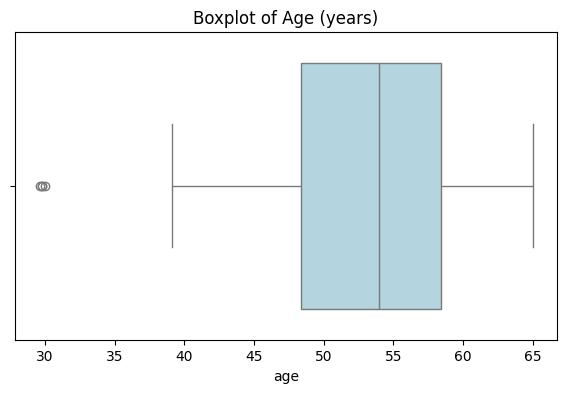

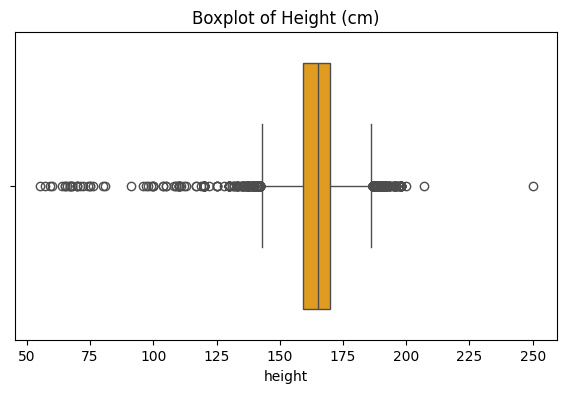

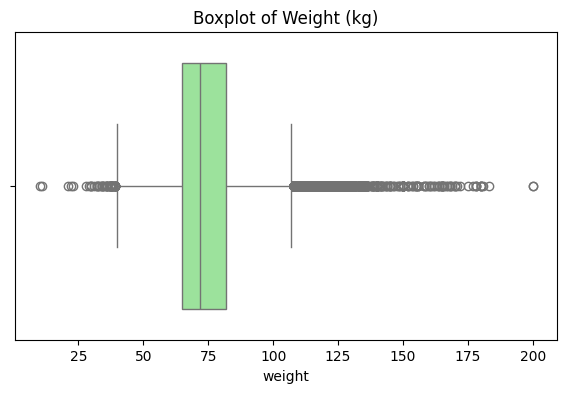

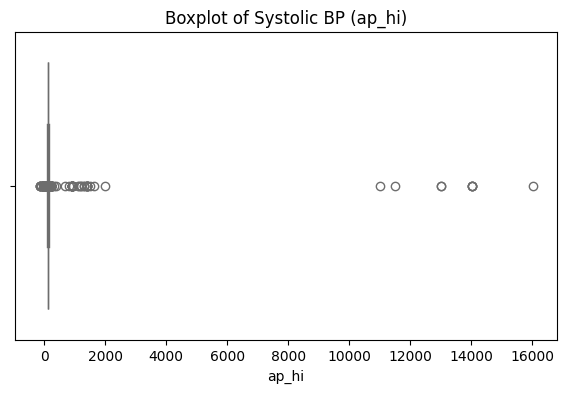

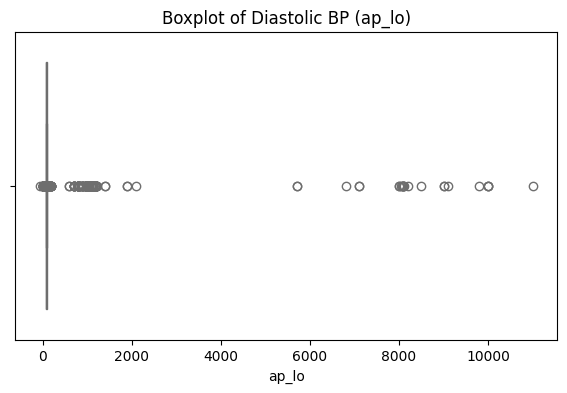

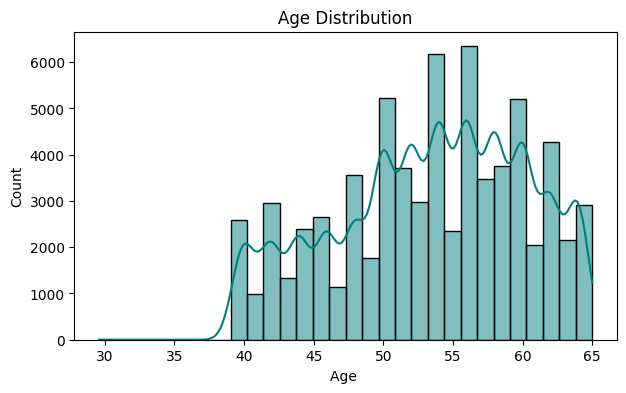

In [7]:
# 2) Visualizations (Before Cleaning)
plt.figure(figsize=(7,4))
sns.boxplot(x=df['age'], color='lightblue')
plt.title("Boxplot of Age (years)")
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(x=df['height'], color='orange')
plt.title("Boxplot of Height (cm)")
plt.show()


plt.figure(figsize=(7,4))
sns.boxplot(x=df['weight'], color='lightgreen')
plt.title("Boxplot of Weight (kg)")
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(x=df['ap_hi'], color='salmon')
plt.title("Boxplot of Systolic BP (ap_hi)")
plt.show()


plt.figure(figsize=(7,4))
sns.boxplot(x=df['ap_lo'], color='violet')
plt.title("Boxplot of Diastolic BP (ap_lo)")
plt.show()


plt.figure(figsize=(7,4))
sns.histplot(df['age'], bins=30, kde=True, color='teal')
plt.title("Age Distribution")
plt.xlabel("Age ")
plt.ylabel("Count")
plt.show()



In [8]:
# 3) Fix swapped BP values
mask = df['ap_lo'] > df['ap_hi']
df.loc[mask, ['ap_hi', 'ap_lo']] = df.loc[mask, ['ap_lo', 'ap_hi']].values

In [9]:
# 4) Remove Outliers using IQR
Q1_hi = df['ap_hi'].quantile(0.25)
Q3_hi = df['ap_hi'].quantile(0.75)
IQR_hi = Q3_hi - Q1_hi
lower_hi = Q1_hi - 1.5 * IQR_hi
upper_hi = Q3_hi + 1.5 * IQR_hi
df = df[(df['ap_hi'] >= lower_hi) & (df['ap_hi'] <= upper_hi)]

# ap_lo
Q1_lo = df['ap_lo'].quantile(0.25)
Q3_lo = df['ap_lo'].quantile(0.75)
IQR_lo = Q3_lo - Q1_lo
lower_lo = Q1_lo - 1.5 * IQR_lo
upper_lo = Q3_lo + 1.5 * IQR_lo
df = df[(df['ap_lo'] >= lower_lo) & (df['ap_lo'] <= upper_lo)]


df = df[(df['ap_hi'] <= 250) & (df['ap_lo'] <= 200)]

In [10]:
# 5) Remove outliers in height, weight, age using IQR
# Height
Q1_height = df['height'].quantile(0.25)
Q3_height = df['height'].quantile(0.75)
IQR_height = Q3_height - Q1_height
lower_height = Q1_height - 1.5 * IQR_height
upper_height = Q3_height + 1.5 * IQR_height
df = df[(df['height'] >= lower_height) & (df['height'] <= upper_height)]

# Weight
Q1_weight = df['weight'].quantile(0.25)
Q3_weight = df['weight'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight
lower_weight = Q1_weight - 1.5 * IQR_weight
upper_weight = Q3_weight + 1.5 * IQR_weight
df = df[(df['weight'] >= lower_weight) & (df['weight'] <= upper_weight)]

# Age
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_age = Q1_age - 1.5 * IQR_age
upper_age = Q3_age + 1.5 * IQR_age
df = df[(df['age'] >= lower_age) & (df['age'] <= upper_age)]

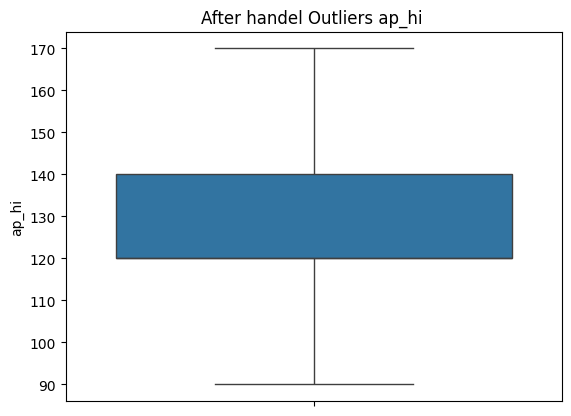

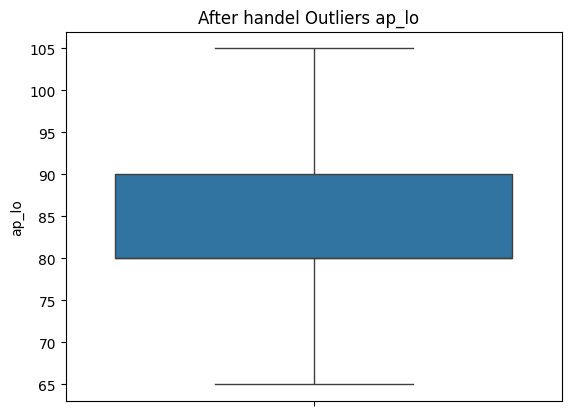

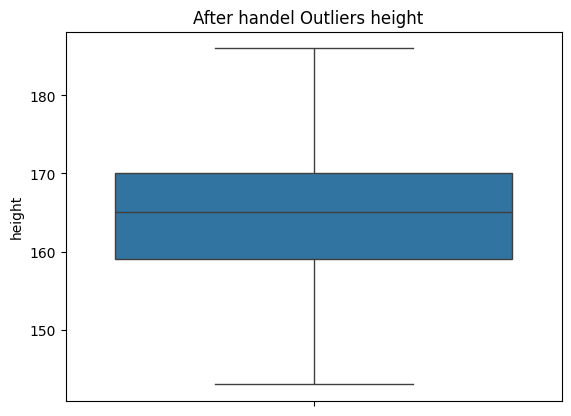

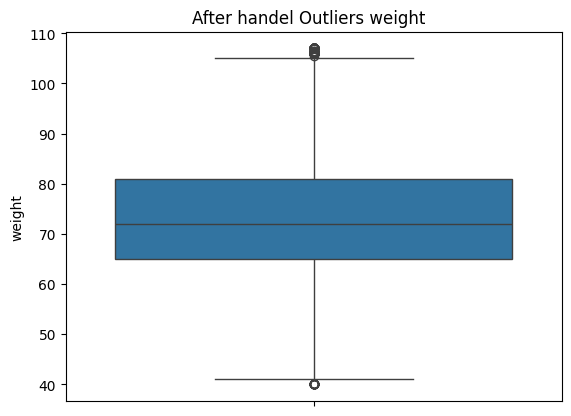

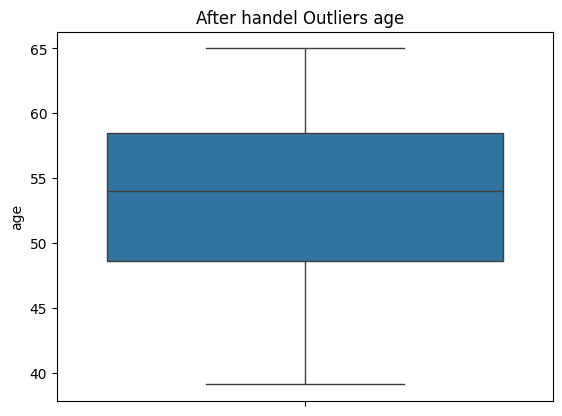

In [11]:
# Visualize after cleaning
sns.boxplot(df['ap_hi'])
plt.title("After handel Outliers ap_hi ")
plt.show()


sns.boxplot(df['ap_lo'])
plt.title("After handel Outliers ap_lo  ")
plt.show()

sns.boxplot(df['height'])
plt.title("After handel Outliers height  ")
plt.show()


sns.boxplot(df['weight'])
plt.title("After handel Outliers weight  ")
plt.show()\


sns.boxplot(df['age'])
plt.title("After handel Outliers age  ")
plt.show()


In [12]:
# 8) Convert categorical features to numbers using LabelEncoder
le = LabelEncoder()
df['cholesterol'] = le.fit_transform(df['cholesterol'])
df['gluc'] = le.fit_transform(df['gluc'])

In [13]:
scaler = RobustScaler()
df[['age', 'height', 'weight']] = scaler.fit_transform(df[['age', 'height', 'weight']])

In [14]:
# 10) Temporal Split using median age
median_age = df['age'].median()
df_train = df[df['age'] < median_age]
df_test = df[df['age'] >= median_age]

X_train = df_train.drop('cardio', axis=1)
y_train = df_train['cardio']
X_test = df_test.drop('cardio', axis=1)
y_test = df_test['cardio']



In [15]:
# 11) Apply SMOTE ONLY ON TRAIN
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("\n Before SMOTE:")
print(y_train.value_counts())

print("\n After SMOTE:")
print(y_train_res.value_counts())


 Before SMOTE:
cardio
0    18577
1    12211
Name: count, dtype: int64

 After SMOTE:
cardio
0    18577
1    18577
Name: count, dtype: int64


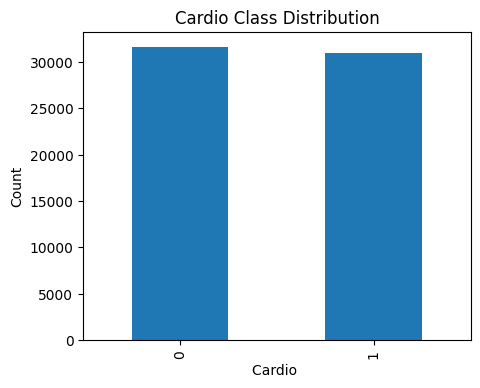

In [16]:
plt.figure(figsize=(5,4))
df['cardio'].value_counts().plot(kind='bar')
plt.title("Cardio Class Distribution")
plt.xlabel("Cardio ")
plt.ylabel("Count")
plt.show()

# Unspervised Learning Task


In [20]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-0.363636,2,0.272727,-0.6250,110,80,0,0,0,0,1,0
1,0.141414,1,-0.818182,0.8125,140,90,2,0,0,0,1,1
2,-0.232323,1,0.000000,-0.5000,130,70,2,0,0,0,0,1
3,-0.575758,2,0.363636,0.6250,150,100,0,0,0,0,1,1
5,0.606061,1,-1.272727,-0.3125,120,80,1,1,0,0,0,0


In [21]:
features = df.drop(['cardio'], axis=1)

features

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,-0.363636,2,0.272727,-0.6250,110,80,0,0,0,0,1
1,0.141414,1,-0.818182,0.8125,140,90,2,0,0,0,1
2,-0.232323,1,0.000000,-0.5000,130,70,2,0,0,0,0
3,-0.575758,2,0.363636,0.6250,150,100,0,0,0,0,1
5,0.606061,1,-1.272727,-0.3125,120,80,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69993,0.000000,1,0.636364,-0.1250,130,90,0,0,0,0,1
69994,0.373737,1,0.000000,0.5000,150,80,0,0,0,0,1
69995,-0.131313,2,0.272727,0.2500,120,80,0,0,1,0,1
69998,0.757576,1,-0.181818,0.0000,135,80,0,1,0,0,0


### K-Means Clustering to find patient clusters

In [24]:
## Check the best value of k in ranges 1 to 10

distortions = [] # scores for elbow method
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 11)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(features)
    
    distortions.append(sum(np.min(cdist(features, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / features.shape[0])
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = sum(np.min(cdist(features, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / features.shape[0]
    mapping2[k] = kmeanModel.inertia_



Distortions for each k:
1 : 13.65233828056005
2 : 8.05911710589197
3 : 6.789927361662187
4 : 6.780128850089418
5 : 4.787032218064637
6 : 4.484024652047721
7 : 4.3343279404013835
8 : 3.8466378938184067
9 : 3.7961792290742085
10 : 3.468535903506979


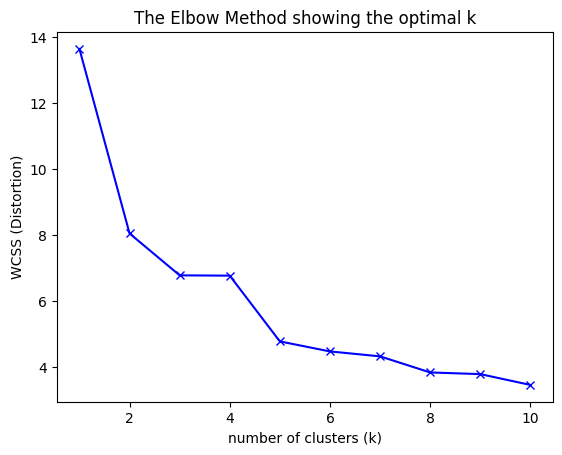

In [25]:
print("Distortions for each k:")
for key, val in mapping1.items():
    print(f"{key} : {val}") 

plt.plot(K, distortions, 'bx-')
plt.xlabel('number of clusters (k)')
plt.ylabel('WCSS (Distortion)')
plt.title('The Elbow Method showing the optimal k')
plt.show()


Inertias for each k:
1 : 16648544.636033
2 : 6215899.744484575
3 : 4154502.6380305085
4 : 3741373.493177717
5 : 2363305.6996797025
6 : 2030008.3325649675
7 : 1857862.374072311
8 : 1562394.275524545
9 : 1400857.6185283265
10 : 1142012.1717932732


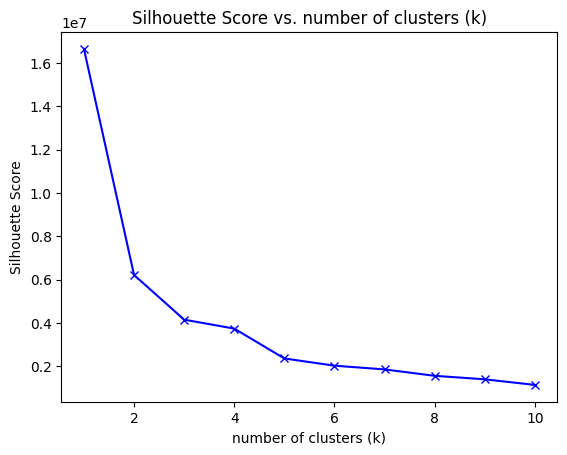

In [26]:
print("Inertias for each k:")
for key, val in mapping2.items():
    print(f"{key} : {val}")

plt.plot(K, inertias, 'bx-')
plt.xlabel('number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. number of clusters (k)')
plt.show()

In [29]:
# for K=6 as required

k = 6

model = KMeans(n_clusters=k, random_state=42)
model.fit(features)
labels = model.labels_
centroids = model.cluster_centers_
df['Cluster'] = labels
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Cluster
0,-0.363636,2,0.272727,-0.6250,110,80,0,0,0,0,1,0,2
1,0.141414,1,-0.818182,0.8125,140,90,2,0,0,0,1,1,5
2,-0.232323,1,0.000000,-0.5000,130,70,2,0,0,0,0,1,3
3,-0.575758,2,0.363636,0.6250,150,100,0,0,0,0,1,1,0
5,0.606061,1,-1.272727,-0.3125,120,80,1,1,0,0,0,0,1


In [31]:
print(df['Cluster'].value_counts())

Cluster
1    25112
5    10219
4     7833
3     7816
0     7050
2     4560
Name: count, dtype: int64


### Using DBSCAN clustering